In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
2,28,1,33.00,3,0,2,4449.4620,0


In [4]:
df.shape

(1338, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


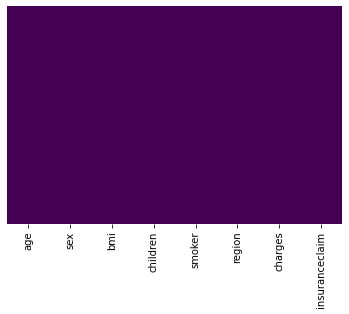

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

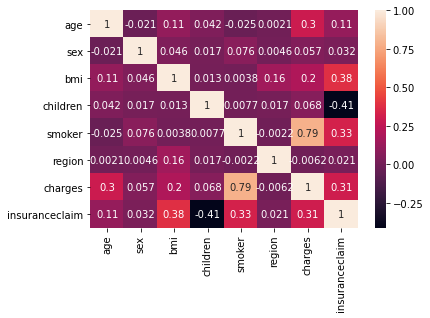

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.drop(['region','charges'],axis=1,inplace=True)

In [10]:
from sklearn.model_selection import RandomizedSearchCV

X = df[['age','sex','bmi','smoker','children']]
Y = df['insuranceclaim']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

param_dist = {'penalty':['l1','l2'],
               'C':[0.001,0.009,0.01,0.09,1,5,10,25]
               }

randomcv = RandomizedSearchCV(estimator= lr, param_distributions=param_dist)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


#lr.fit(x_train, y_train)
#pred = lr.predict(x_test)

from sklearn.model_selection import GridSearchCV

grid_values = {'penalty':['l1','l2'],
               'C':[0.001,0.009,0.01,0.09,1,5,10,25]
               }
grid_lr_acc = GridSearchCV(lr, param_grid=grid_values)
grid_lr_acc.fit(x_train, y_train)

pred = grid_lr_acc.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,recall_score

acc_score = accuracy_score(y_test, pred)
print("Accuracy score -",acc_score)

f_score = f1_score(y_test, pred)
print("F1 score -",f_score)

re_score = recall_score(y_test, pred)
print("Recall score -",re_score)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

print(cm)

Accuracy score - 0.8805970149253731
F1 score - 0.9008264462809918
Recall score - 0.889795918367347
[[136  21]
 [ 27 218]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.91      0.89      0.90       245

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



In [12]:
import pickle
file = open('insurance_logistic.pkl', 'wb')
pickle.dump(grid_lr_acc, file)